In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import pandas as pd
idx = pd.IndexSlice

$$
\newcommand{\gap}{\hspace{.25cm}}
\newcommand{\gmath}{\hspace{.25cm}\displaystyle}
$$

# Covariance and Correlation

Have you ever noticed that taller people tend to wear larger shoe sizes?

Put another way, this statement suggests that shorter people will have smaller shoe sizes and shoe size will increase as we study taller and taller people.

That is, as we vary people's heights, we expect their shoe size to vary as well and to vary in the same direction (i.e., increasing height corresponds to increasing shoe size).

Across people, height and shoe size tend to **covary**.

Let $X$ and $Y$ be two variables.

***Covariance*** is <font color='blue'>the expected value of the product of their deviations from their individual expected values</font>:

$
\gmath
\begin{align}
cov(X,Y) 
&= \color{blue}{E[(X-E[X])(Y-E[Y])]}
= E[XY-XE[Y]-YE[X]+E[X]E[Y]]
\\\\
&= E[XY]-2E[X]E[Y]+E[X]E[Y]
=E[XY]-E[X]E[Y]
\\\\
\end{align}
$

Remember 
$
\gmath
E[X\cdot\color{red}{E[Y]}] = \sum_{x\in X}x\cdot P(X=x)\cdot \color{red}{E[Y]} = \color{red}{E[Y]}\cdot\sum_{x\in X}x\cdot P(X=x) = \color{red}{E[Y]}E[X]
$

The $\gap(X-E[X])\gap$ and $\gap(Y-E[Y])\gap$ terms center the variables $X,Y$ 

And the product $\gap(X-E[X])(Y-E[Y])\gap$ exaggerates when $X,Y$ are both large together.

Note that the units of $\gap cov(X,Y)=E[XY]-E[X]E[Y]\gap$ will be the units of $X$ times the units of $Y$ which might be hard to interpret.

For example, if $X$ is a person's height measured in feet and $Y$ is shoe size measured in inches, then $\gap cov(X,Y)\gap$ will have units $\gap(\text{height in feet})(\text{shoe size in inches})$

To measure covariance without units, we can normalize $\gap cov(X,Y)\gap$ by the standard deviation of each variable. 

This gives us the ***Pearson correlation coefficient***:
$
\gmath
\rho_{XY}=corr(X,Y) 
= \frac{cov(X,Y)}{\sigma_X\sigma_Y}
= \frac{cov(X,Y)}{\sqrt{Var(X)}\cdot\sqrt{Var(Y)}}
$

While $\gap cov(X,Y)\gap$ is unbounded, $\gap \rho_{XY}\in[-1,1]\gap$ with 
- $\rho_{XY}=1\gap$ indicating perfect covariance (i.e., $X,Y$ increase and decrease together), and 
-$\rho_{XY}=-1\gap$ indicating perfect negative covariance (i.e., if $X$ increases, then $Y$ decreases, and vice versa), and
- $\rho_{XY}=0\gap$ indicates no covariance.


Imagine $\gap X,Y\gap$ are two columns from data set of $n$ observations (e.g., $X$ is height and $Y$ is shoe size).

We can calculate the correlation according to 

$
\gmath
\rho_{XY} = \frac{\displaystyle\sum_{i=1}^n \left(x_i-\langle x\rangle\right)\left(y_i-\langle y\rangle\right)}{\sqrt{ \displaystyle\sum_{i=1}^n \left(x_i-\langle x\rangle\right)^2\cdot \sum_{i=1}^n \left(y_i-\langle y\rangle\right)^2 }}
$

where $x_i$ is the $i$th data point in column $X$ and $\langle x\rangle$ is the average of the data in column $X$ (similarly for the $y$ variables)

In [108]:
#hide 
from scipy.stats import pearsonr
import ipywidgets as widgets
from IPython.display import display

corr_noise = np.random.normal(0, 1, 100)
corr_x = np.random.normal(0, 1, 100)

def update_plot(correlation):
    # Generate correlated data
    y = correlation * corr_x + np.sqrt(1 - correlation**2) * corr_noise

    # Compute regression line
    slope, intercept, rho, pvalue, stderr = linregress(corr_x, y)
    line_x = np.linspace(min(corr_x), max(corr_x), 100)
    line_y = slope * line_x + intercept

    # Create plot
    plt.figure(figsize=(10,8))
    plt.plot(corr_x, y,'o',markersize=10,label="Data")
    plt.plot(line_x, line_y, 'r', alpha=1,lw=5,label="Line of Best Fit")
    plt.xlabel('X',fontsize=15)
    plt.ylabel('Y',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=13)
    plt.tight_layout()
    plt.title(f'Pearson Correlation: {rho:.2f}',fontsize=15)
#     plt.grid(True, alpha=0.3)
    plt.show()

correlation_slider = widgets.FloatSlider(
    value=0.5,
    min=-1.0,
    max=1.0,
    step=0.01,
    description='Relationship:',
    continuous_update=False
)

widgets.interactive(update_plot, correlation=correlation_slider)

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Relationship:', max=1.0, mi…

$\rho_{XY}\gap$ is measuring the <i>linear</i> relationship between variables $X$ and $Y$, and we can see this from $\gap cov(X,Y)$

Imagine $\gap Y=m\cdot X+b\gap$ for some constants $\gap m,b\gap$

$
\gmath
\color{blue}{Var(Y) = Var(mX+b) = m^2\cdot Var(X)}
$

$
\gmath
\begin{align}
\color{orange}{cov(X,Y)} 
&= E[XY]-E[X]E[Y]
= E[mX^2+bX]-E[X]E[mX+b]
\\\\
&= m\cdot E[X^2]+b\cdot E[X]-E[X]\left(m\cdot E[X]+b\right)
\\\\
&= m\cdot E[X^2]\color{red}{+b\cdot E[X]}-m\cdot E[X]^2\color{red}{-b\cdot E[X]}
\\\\
&= m\left(E[X^2]-E[X]^2\right)
=\color{orange}{m\cdot Var(X)}
\end{align}
$

Thus
$
\gmath
\rho_{XY} 
= \frac{\color{orange}{cov(X,Y)}}{\sigma_X\color{blue}{\sigma_Y}} 
= \frac{\color{orange}{cov(X,Y)}}{\sqrt{Var(X)}\color{blue}{\sqrt{Var(Y)}}} 
= \frac{\color{orange}{m\cdot Var(X)}}{\sqrt{Var(X)}\cdot\color{blue}{m\cdot\sqrt{Var(X)}}} = 1
$

## Caution when interpreting correlation
$\rho_{XY}\gap$ measures the strength of a linear relationship between variables $X$ and $Y$, but there are lots of relationships between $X,Y$ that are not linear but appear linear using correlations.

These example scatter plots each have the same correlation $\gap\rho_{XY}=0.816$

<img src="./Anscombe's_quartet_3.svg.png" width=70% />

Often data is merely a sample taken from some underlying population. And so, we might wonder if our measured $\rho_{XY}$ based on data is statistically significant enough to suggest that the relationship applies to $X_{\text{population}}$ and $Y_{\text{population}}$

We can check this using hypothesis testing:
- **Null Hypothesis ($H_0$)**: The population $\gap\rho_{XY}=0$
- **Alternative Hypothesis ($H_1$)**: The population $\gap\rho_{XY}\neq0$

We compare $\rho_{XY}$ from the sample to a Student's t-distribution with $n-2$ degrees of freedom.

(Skipping the derivation) The standard error for sample $\rho_{XY}$ is $\gmath\sigma_{\rho_{XY}}=\sqrt{\frac{1-\rho_{XY}^2}{n-2}}$

and our statistic is $\gmath t= \frac{\rho_{XY}}{\sigma_{\rho_{XY}}} = \rho_{XY}\sqrt{\frac{n-2}{1-\rho_{XY}^2}}\gap$ which we compare to the t-distribution to identify a probability, called a **p-value**, for this outcome or something more extreme.

In [112]:
# programmatically calculate Pearson correlation
import scipy
# create synthetic data with a prescribed correlation
correlation = -.4
x = np.random.randn(100)
y = correlation * x + np.sqrt(1 - correlation**2) * np.random.normal(0, 1, 100)
# measure Pearson correlation
rho,pvalue = scipy.stats.pearsonr(x,y)
print("Pearson rho=%0.2f with pvalue=%0.3f" % (rho,pvalue))

Pearson rho=-0.37 with pvalue=0.000


# Correlation Vs. Causation

Ice cream sales and drowning incidents both increase in summer months; they are correlated.

Does this mean that ice cream sales **cause** drowning incidence?

Why might these be correlated?

In this case, a third variable, namely the <i>temperature</i>, may actually cause both sales and drownings to increase and decrease in tandem.

As temperature increases, more people buy ice cream and more people want to go swimming, which creates more opportunities for drowning.

A third variable that explains the correlation between two other variables is sometimes called a **confounder**

In general, correlation between variables $X$ and $Y$ does not mean that $X$ causes $Y$.

Many of these correlations are **spurious**, meaning that they occured by chance.

That is, spurious correlations do not mean $X$ causes $Y$ and may occur even without a third variable causing both.

There are many examples: https://tylervigen.com/spurious-correlations

## What is Causation?

Causation implies that one event is the result of the occurrence of another event. This is a cause-and-effect relationship.

A cause must precede the outcome and, often, changes in the cause are correlated with changes in the outcome (i.e., they co-vary).

Co-variation between cause and outcome may not be perfect.

**Examples** where $X$ causes $Y$:
- Pushing a ball causes it to roll.
    - $X$ is the force applied to the ball, $Y$ is the ball's distance traveled
    - $\rho_{XY}$ should be very high
- Studying leads to better exam scores.
    - $X$ is the time spent studying, $Y$ is the exam score.
    - $\rho_{XY}$ should be positive but may not be perfect. For example, there may be diminishing returns to more hours studying.


In [116]:
# number of data points
n = 100
# define causal variable
X = np.random.random(n)
e = .5 # parameter for tuning strength of random noise
Y = .3*X+2 + e*np.random.random(n)

In [115]:
# hide
def causationDemo(e):
    # e is the scale of the noise
    # define outcome variable + random noise
    Y = .3*X+2 + e*np.random.random(n)
    plt.figure(figsize=(8,6))
    plt.plot(X,Y,'o',markersize=10)
    plt.ylim((1.5,3))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("X",fontsize=15)
    plt.ylabel("Y",fontsize=15)
    R,p = scipy.stats.pearsonr(X,Y)
    plt.title("Pearson $\\rho=%0.2f$" % R,fontsize=15)
    plt.tight_layout()
    
widgets.interact(causationDemo,e=(0,1,.05));

interactive(children=(FloatSlider(value=0.0, description='e', max=1.0, step=0.05), Output()), _dom_classes=('w…

In [63]:
# number of data points
n = 100
# define causal variable
Z = np.random.random(n)
e = .5 # parameter for tuning strength of random noise
Y = .3*Z+2 + e*np.random.random(n)
X = -.2*Z-1 + e*np.random.random(n)

In [64]:
# hide
def causationDemoWithCounfounder(e):
    # e is the scale of the noise
    # define outcome variable + random noise
    Y = .3*Z+2 + e*np.random.random(n)
    X = -.2*Z-1 + e*np.random.random(n)
    # X & Y will be correlated, but X does not cause Y
    plt.figure(figsize=(8,6))
    plt.plot(X,Y,'o',markersize=10)
    plt.ylim((1.8,3.5))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("X",fontsize=15)
    plt.ylabel("Y",fontsize=15)
    R,p = scipy.stats.pearsonr(X,Y)
    plt.title("Pearson $\\rho=%0.2f$" % R,fontsize=15)
    plt.tight_layout()
    
widgets.interact(causationDemoWithCounfounder,e=(0,1,.05));

interactive(children=(FloatSlider(value=0.0, description='e', max=1.0, step=0.05), Output()), _dom_classes=('w…

# Refresher on OLS Regression

Let $\vec{y}$ be an outcome we want to predict using a linear combination of the variables encoded into the columns of matrix $M$

Instead of $\hspace{1cm}M\vec{\beta}\approx\color{blue}{\vec{y}}$

we multiply both sides of the equation by $M^T$ and solve the following for $\color{red}{\vec{\beta}}$

$
\left(M^TM\right)\vec{\beta} \approx M^T\color{blue}{\vec{y}}
\hspace{1cm}\Rightarrow\hspace{1cm}
\color{red}{\hat{\beta}} \approx \left(M^TM\right)^{-1}\cdot M^T\vec{y}
$

The solution we get will be an **estimate** $\color{red}{\hat{\beta}}$ for the true vector $\vec{\beta}$. The components $\color{red}{\hat{\beta}_i}$ of $\color{red}{\hat{\beta}}$ are called **coefficients**.

During the module on OLS Regression, we looked at predicting housing prices based on the characteristics of the property for sale. We saw that predictive performance improved with more variables in the model (i.e., more columns of $M$), but the coefficients associated with each variable changed dramatically.

In [118]:
# read in housing price data as a dataframe
data = pd.read_csv("./kaggleHousingPrices/train.csv")
# get matrix M and sale price vector y
y = data["SalePrice"]
M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr"]]
# use M transpose approach
beta_hat = np.linalg.solve(M.T@M,M.T@y)
pd.Series(data = beta_hat,index = M.columns,).sort_values()

LotArea             1.190920
PoolArea           59.027950
GarageArea        236.762178
BedroomAbvGr    18931.625535
dtype: float64

In [7]:
M = data[["LotArea","GarageArea","PoolArea","GrLivArea","BedroomAbvGr","OverallCond","OverallQual",]]
pd.Series(data = np.linalg.solve(M.T@M,M.T@y),index = M.columns,).sort_values()

BedroomAbvGr   -17117.597699
OverallCond     -5463.293108
PoolArea          -18.799606
LotArea             0.681247
GarageArea         59.607438
GrLivArea          64.353832
OverallQual     21165.914665
dtype: float64

PoolArea was positively associated with sales price in the first model, but negatively associated with sales price in the second model.

So, does having a larger pool cause a property to sell at a higher price? This is a <i>causal</i> question.

Intuitively, I think it should increase the price. But what why then do we have variable regression results?

# Measuring Regression Coefficients

Let $\vec{y}$ be an outcome we want to predict using a linear combination of the variables encoded into the columns of matrix $M$

We then use OLS regression to estimate $\hat{\beta}$ which captures the regression **coefficients**.

Each component $\hat{\beta}_i$ in the vector $\hat{\beta}$ is the regression coefficient associated with the $i$th variable (i.e., the $i$th column of $M$).

In the housing sales price example, we saw that one of the coefficients $\hat{\beta}_i$ changed dramatically when we included an additional column of $M$ (i.e., an additional variable) in the OLS regression.

We can understand regression coefficients for a simple linear model with one variable: $\gmath \vec{y}\sim\beta_0+\beta_1\vec{x}$

After fitting $\beta_0,\beta_1$ with OLS regression, we use the model to predict $\hat{y}$ and we know that $\color{red}{\beta_0=\langle\vec{y}\rangle-\beta_1\langle\vec{x}\rangle}$

From this, we see that if we fit the model using only the $\beta_0$ (i.e., setting $\beta_1=0$), then $\beta_0=\langle\vec{y}\rangle$

What about $\beta_1$? We know that $\beta_1$ minimizes the residuals squared. That is, it minimizes
$
\gmath
\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2
\gap
$


So, to pick $\beta_1$, we take the partial derivative of the residual calculation with respect to $\beta_1$ and set that equal to 0:

$
\gmath
\begin{align}
0 
&=\frac{d}{d \beta_1} \left[ \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2 \right] 
= -2 \sum_{i=1}^{n} x_i \cdot (y_i - \beta_0 - \beta_1x_i)
\gap\gap\text{using the Chain Rule}
\\\\
&= \sum_{i=1}^{n} x_i y_i - \color{red}{\beta_0} \sum_{i=1}^{n} x_i - \beta_1 \sum_{i=1}^{n} x_i^2
= \sum_{i=1}^{n} x_i y_i - \left(\color{red}{\langle\vec{y}\rangle-\beta_1\langle\vec{x}\rangle}\right) \sum_{i=1}^{n} x_i - \beta_1 \sum_{i=1}^{n} x_i^2
\hspace{.5cm}\text{using the previous slide}
\\\\
&\Rightarrow\gap
\beta_1 \left( \sum_{i=1}^{n} x_i^2 - \sum_{i=1}^{n} \langle\vec{x}\rangle x_i \right) = \sum_{i=1}^{n} x_i y_i - n \langle \vec{x}\rangle \langle\vec{y}\rangle
\\\\
&\gap\Rightarrow\gap
\beta_1 = \frac{\color{blue}{\frac{1}{n}}\left(\sum_{i=1}^{n} x_i y_i - n \langle\vec{x}\rangle \langle\vec{y}\rangle\right)}{\color{blue}{\frac{1}{n}}\left(\sum_{i=1}^{n} x_i^2 - n \langle\vec{x}\rangle^2\right)}
=\frac{E[\vec{x}\vec{y}]-E[\vec{x}]E[\vec{y}]}{E[\vec{x}^2]-E[\vec{x}]^2}
=\frac{\text{Cov}(\vec{x}, \vec{y})}{\text{Var}(\vec{x})}
\end{align}
$

For a more complicated linear model with more than one variable, the math is much more involved. But the coefficients $\beta_i$ are the covariance of $\vec{x}_i$ and $\vec{y}$ while holding each other variable constant.

We have coefficient estimates $\hat{\beta}$ that we hope approximate the true underlying relationship between variables (i.e., $\vec{\beta}$), but are they <i>statistically significant</i>? 

Usually, we cannot test if the $\hat{\beta}\approx\vec{\beta}$ because, if we knew $\vec{\beta}$, then why approximate it with $\hat{\beta}$?

We test a simpler question: Which coefficients are nonzero? 

Coefficients that are nonzero have a nontrivial correlation with the dependent variable (i.e., the variable being predicted). 

For each $\hat{\beta}_i$, we have the following hypotheses:
- **Null Hypothesis ($H_0$):** The estimated coefficient $\hat{\beta}_i$ is not significantly different from zero (i.e., $|\hat{\beta}_i|\approx0$), implying no effect.
- **Alternative Hypothesis ($H_1$):** The estimated coefficient $\hat{\beta_i}$ is significantly different from zero (i.e., $|\hat{\beta}_i|>0$), implying an effect.

We need a test statistic for these hypotheses, but what is the right choice? How much uncertainty is there around our estimated $\hat{\beta}_i$? 

Remember that $\hat{\beta}$ is the solution that produces a predicted line $M\hat{\beta}=\hat{y}$ of best fit in the sense that it minimizes residuals (i.e., $\hat{y}_j-\vec{y}_j$ for each observation $j$).

The **standard error of a coefficient estimate** provides a measure of variability in the estimate due to sampling variability:

1. **Estimate Residuals**: First find the residuals ($\hat{\varepsilon}$) of the model:
   $
   \hat{\varepsilon} = \vec{y} - M\hat{\beta} = \vec{y}-\hat{y}
   $

2. **Estimate Residual Variance**: Calculate the variance of the residuals, often referred to as the mean squared error (MSE):
   $
   \text{MSE} = \frac{\hat{\varepsilon}' \cdot\hat{\varepsilon}}{n - k - 1}
   $

   where $n$ is the number of observations (i.e., rows in $M$) and $k$ is the number of variables (i.e., columns in $M$)

3. **Calculate Variance-Covariance Matrix**: The variance-covariance matrix of the coefficient estimates is:
   $
   \text{Var}(\hat{\boldsymbol{\beta}}) = \text{MSE} \cdot (M^T\cdot M)^{-1}
   $

4. **Standard Error of Coefficient**: The standard error for each coefficient $\hat{\beta}_i$ is the square root of the diagonal elements of the variance-covariance matrix:
   $
   SE(\hat{\beta}_i) = \sqrt{\text{Var}(\hat{\beta}_i)}
   $

In [119]:
# read in housing price data as a dataframe
data = pd.read_csv("./kaggleHousingPrices/train.csv")
# get matrix M and sale price vector y
y = data["SalePrice"]
M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr"]]
# use M transpose approach
beta_hat = np.linalg.solve(M.T@M,M.T@y)
pd.Series(data = beta_hat,index = M.columns,).sort_values()

LotArea             1.190920
PoolArea           59.027950
GarageArea        236.762178
BedroomAbvGr    18931.625535
dtype: float64

In [120]:
# Calculate residuals
y_hat = M@beta_hat
e_hat = y-y_hat
# calculate MSE of estimate residuals
MSE = (e_hat.T @ e_hat) / (M.shape[0]-M.shape[1]-1)
# estimate variance-covariance matrix
# main diagonal is variance associated with each coefficient estimate
# off-diagonals are covariance estimates between pairs of coefficient estimates
var_beta = MSE * np.linalg.inv(M.T@M)
print(var_beta)
print("Just main diagonal:")
print(np.diag(var_beta))

[[ 2.65840027e-02 -2.54902510e-01 -3.61374353e-01 -5.34937238e+01]
 [-2.54902510e-01  4.54703762e+01 -3.35838524e+00 -6.10229936e+03]
 [-3.61374353e-01 -3.35838524e+00  1.58121937e+03 -3.70518682e+01]
 [-5.34937238e+01 -6.10229936e+03 -3.70518682e+01  1.41217708e+06]]
Just main diagonal:
[2.65840027e-02 4.54703762e+01 1.58121937e+03 1.41217708e+06]


In [10]:
# calculate standard error of coefficient estimates
se_beta_hat = np.sqrt(np.diag(var_beta))
se_beta_hat

array([1.63046014e-01, 6.74317256e+00, 3.97645491e+01, 1.18835057e+03])

We statistically test our hypotheses using the **t-Statistic for Individual Coefficients:**
$\gmath t_i = \frac{\hat{\beta}_i}{SE(\hat{\beta}_i)} $

**Decision Rule**
  - Compare the calculated $ t $-statistic to the critical value from the t-distribution with $ n - k - 1 $ degrees of freedom.
  - Alternatively, use the p-value: if $ \text{p-value} < \alpha $ (often $ \alpha = 0.05 $), reject $H_0 $

In [11]:
t_beta_hat = beta_hat / se_beta_hat
t_beta_hat

array([ 7.30419542, 35.11139236,  1.48443655, 15.93101059])

In [12]:
from scipy.stats import t
degreesOfFreedom = M.shape[0]-M.shape[1]-1
p_values = 2 * (1 - t.cdf(abs(t_beta_hat), df=degreesOfFreedom))
p_values

array([4.57633931e-13, 0.00000000e+00, 1.37909742e-01, 0.00000000e+00])

Another way to understand our confidence in our coefficient estimates is to report the **Confidence Intervals for Coefficients:** $\gmath\hat{\beta}_i \color{red}{\pm} \color{blue}{t^*} \cdot SE(\hat{\beta}_i) $

This approach provides the interval $\gap[\hat{\beta}_i \color{red}{-} \color{blue}{t^*} \cdot SE(\hat{\beta}_i),\hat{\beta}_i \color{red}{+} \color{blue}{t^*} \cdot SE(\hat{\beta}_i)]\gap$ within which we think the true population parameter $\beta_i$ likely falls.

$\color{blue}{t^*}$ is the t-statistic associated with $\alpha=0.05$, so we are 95% confident that the true population coefficient lies within the interval.

In [13]:
t_star = t.ppf(0.95, degreesOfFreedom)
CI = np.stack((
    beta_hat - t_star*se_beta_hat,
    beta_hat + t_star*se_beta_hat,
)).T
print(CI)

[[ 9.22562259e-01  1.45927764e+00]
 [ 2.25663579e+02  2.47860776e+02]
 [-6.42058339e+00  1.24476484e+02]
 [ 1.69757175e+04  2.08875336e+04]]


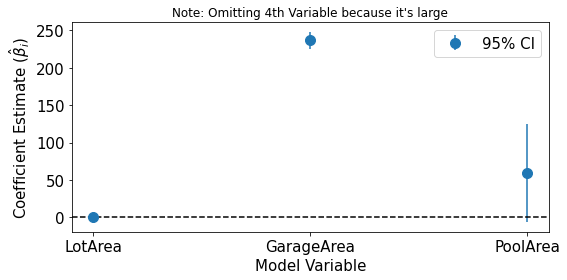

In [14]:
# hide
plt.figure(figsize=(8,4))
x = np.arange(M.shape[1])
plt.errorbar(x[:-1],beta_hat[:-1],yerr = t_star*se_beta_hat[:-1],fmt='o',markersize=10,label="95% CI")
xx = plt.xlim()
plt.plot(xx,[0,0],'k--')
plt.xlim(xx)
plt.xticks(x[:-1],M.columns[:-1],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Model Variable",fontsize=15)
plt.ylabel("Coefficient Estimate ($\\hat{\\beta}_i$)",fontsize=15)
plt.legend(fontsize=15)
plt.title("Note: Omitting 4th Variable because it's large")
plt.tight_layout()

In [15]:
# scikit-learn is a Python library for doing machine learning
# It includes an implementation of OLS Regression
from sklearn.linear_model import LinearRegression
ols = LinearRegression(fit_intercept=False).fit(M,y)
ols.coef_,beta_hat

(array([1.19091995e+00, 2.36762178e+02, 5.90279501e+01, 1.89316255e+04]),
 array([1.19091995e+00, 2.36762178e+02, 5.90279501e+01, 1.89316255e+04]))

# Interpreting Regression Coefficients
We discussed how to measure our <i>statistical confidence</i> that our coefficient estimates are close to true population coefficients. 

But what about interpreting these coefficients in a real-world sense?

Let's continue working with the home sales data.

In [16]:
M.head(3)

,LotArea,GarageArea,PoolArea,BedroomAbvGr
0,8450,548,0,3
1,9600,460,0,3
2,11250,608,0,3


At first, it's tempting to conclude that the variables with the larger coefficients are more important to the model because we are more confident that these coefficients are non-zero.

But our current estimates of regression coefficients have units associated with them.

For example, LotArea is measured in feet-squared, while the outcome variable, SalesPrice, is measured in dollars. The BedroomAbvGr variable is some positive integer.

Our regression model says $\gmath \text{SalesPrice} \sim \beta_0\cdot\text{LotArea}+\beta_1\cdot\text{GarageArea}+\beta_2\cdot\text{PoolArea}+\beta_3\cdot\text{BedroomAbvGr}$

Which means that $\beta_0$ should have the units "dollars per square foot" and $\beta_3$ should have the units "dollars per room."

It's hard to directly compare "dollars per square foot" to "dollars per room."

One option is to **center and standardize each variable** which means to translate each variable into a Z-score so that the resulting variable is unit-less (i.e., it's units are standard deviations from zero).

Note that this approach implicitly assumes that each variable is roughly normally distributed, but this need not be the case.

In [17]:
# center each column of M by translating to a z-score
M_centered = (M-np.mean(M,axis=0)) / np.std(M,axis=0)

In [18]:
# hide
a = np.mean(M_centered,axis=0)
b = np.mean(M,axis=0)
a.name = "Centered Mean"
b.name = "Original Mean"
# means after centering are roughly zero
pd.concat([a,b],axis=1).round(5).abs()

,Centered Mean,Original Mean
LotArea,0.0,10516.82808
GarageArea,0.0,472.98014
PoolArea,0.0,2.75890
BedroomAbvGr,0.0,2.86644


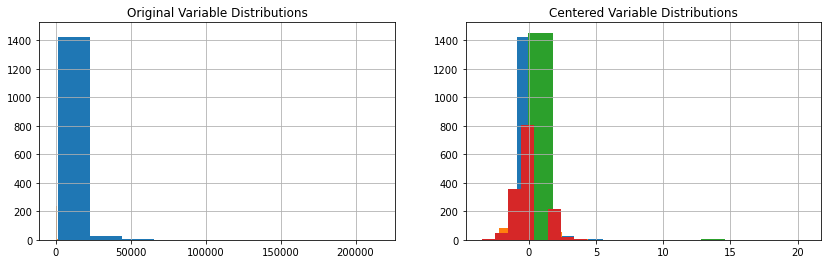

In [19]:
# hide
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
for i in range(M.shape[1]):
    M.iloc[:,i].hist()
plt.title("Original Variable Distributions")
plt.subplot(1,2,2)
for i in range(M.shape[1]):
    M_centered.iloc[:,i].hist()
plt.title("Centered Variable Distributions");

In [20]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression(fit_intercept=False).fit(M_centered,y)
ols.coef_

array([11243.30106773, 46727.81416465,  2993.55012125,  8752.22725726])

We have different coefficient estimates now (although the sign should be unchanged), and we follow the same process as before to test the statistical significance of our coefficient estimates but we also center the dependent variable SalesPrice.

Now the coefficients tell us how a standard deviation change in one variable (e.g., LotArea) relates to a standard deviation change in the outcome variable (i.e., SalesPrice).

In [121]:
# Calculate residuals
y_centered = (y - np.mean(y)) / np.std(y)
ols = LinearRegression(fit_intercept=False).fit(M_centered,y_centered)
beta_hat_centered = ols.coef_
y_hat = M_centered@beta_hat_centered
e_hat = y_centered-y_hat
# calculate MSE of estimate residuals
MSE = (e_hat.T @ e_hat) / (M_centered.shape[0]-M_centered.shape[1]-1)
# estimate variance-covariance matrix
var_beta = MSE * np.linalg.inv(M_centered.T@M_centered)
degreesOfFreedom = M_centered.shape[0]-M_centered.shape[1]-1
# calculate standard error of coefficient estimates
se_beta_hat_centered = np.sqrt(np.diag(var_beta))
t_beta_hat_centered = beta_hat_centered / se_beta_hat_centered
p_values = 2 * (1 - t.cdf(abs(t_beta_hat), df=degreesOfFreedom))
# exactly the same as before
print("Coef. Est. p-values:")
print(p_values)
t_star = t.ppf(0.95, degreesOfFreedom)
CI = np.stack((beta_hat - t_star*se_beta_hat_centered,beta_hat_centered + t_star*se_beta_hat_centered,)).T
print("95% Confidence Intervals for each Coef. Est.")
print(CI)

Coef. Est. p-values:
[4.57633931e-13 0.00000000e+00 1.37909742e-01 0.00000000e+00]
95% Confidence Intervals for each Coef. Est.
[[1.15742429e+00 1.75071678e-01]
 [2.36728880e+02 6.21696162e-01]
 [5.89950687e+01 7.05762579e-02]
 [1.89315925e+04 1.43222751e-01]]


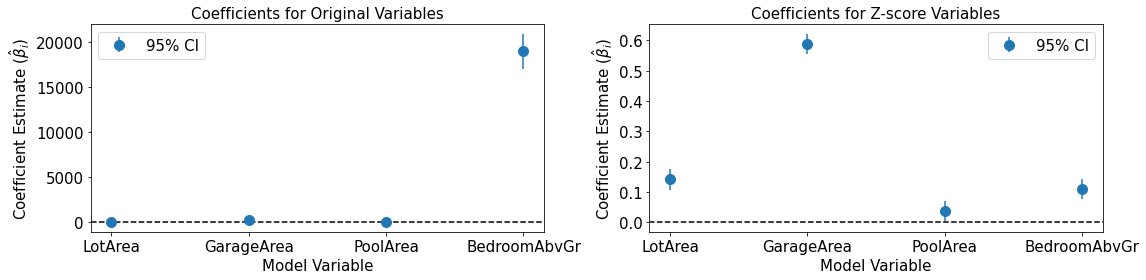

In [122]:
# hide
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
x = np.arange(M.shape[1])
plt.errorbar(x,beta_hat,yerr = t_star*se_beta_hat,fmt='o',markersize=10,label="95% CI")
xx = plt.xlim()
plt.plot(xx,[0,0],'k--')
plt.xlim(xx)
plt.xticks(x,M.columns,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Model Variable",fontsize=15)
plt.ylabel("Coefficient Estimate ($\\hat{\\beta}_i$)",fontsize=15)
plt.legend(fontsize=15)
plt.title("Coefficients for Original Variables",fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
x = np.arange(M.shape[1])
plt.errorbar(x,beta_hat_centered,yerr = t_star*se_beta_hat_centered,fmt='o',markersize=10,label="95% CI")
xx = plt.xlim()
plt.plot(xx,[0,0],'k--')
plt.xlim(xx)
plt.xticks(x,M.columns,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Model Variable",fontsize=15)
plt.ylabel("Coefficient Estimate ($\\hat{\\beta}_i$)",fontsize=15)
plt.legend(fontsize=15)
plt.title("Coefficients for Z-score Variables",fontsize=15)
plt.tight_layout()

Now the coefficients are directly comparable because they have the same units: $\hat{\beta}_i$ has units "standard deviation change in SalesPrice for a standard deviation change in variable $i$."

One standard deviation change in GarageArea corresponds to the largest change in SalesPrice.

# Is the OLS regression model correct?

Our regression model says $\gmath \text{SalesPrice} \sim \beta_0\cdot\text{LotArea}+\beta_1\cdot\text{GarageArea}+\beta_2\cdot\text{PoolArea}+\beta_3\cdot\text{BedroomAbvGr}\gap$ but there are some potential problems with this forumla.

First, this model assumes that a home with no yard, no garage, no pool, and no bedrooms should have a sales price of \$0, but this need not be true! A building without these features is still worth something.

We update our model to include an **intercept** ($\color{red}{I}$) which is just an additional variable that always has the value of 1 (i.e., $\color{red}{I=\vec{1}}$).

Our regression model becomes $\gmath \text{SalesPrice} \sim \color{red}{\beta_0\cdot I}+ \beta_1\cdot\text{LotArea}+\beta_2\cdot\text{GarageArea}+\beta_3\cdot\text{PoolArea}+\beta_4\cdot\text{BedroomAbvGr}$

The coefficient for the intercept term ($\color{red}{\beta_0}$) will equal the average of the dependent variable because the average is the single number with the smallest residuals on average.

In [125]:
# hide
x = np.linspace(0,1,20)
y = 2+3*x+.5*np.random.normal(0,1,len(x))

def compareIntercept(fit_intercept):
    ols = LinearRegression(fit_intercept=fit_intercept).fit(x[:,np.newaxis],y)
    yhat1 = ols.predict(x[:,np.newaxis])
    # ols = LinearRegression(fit_intercept=True).fit(x[:,np.newaxis],y)
    # yhat2 = ols.predict(x[:,np.newaxis])
    plt.figure(figsize=(8,6))
    plt.plot(x,y,'o',color='k',label="Ground Truth",markersize=10)
    plt.plot(x,yhat1,'o',color='r',markersize=10,
             label="Prediction w/ Intercept" if fit_intercept else "Prediction w/o Intercept")
    # plt.plot(x,yhat2,'o',color='b',label="Prediction w/ Intercept")
    xx = plt.xlim()
    plt.plot([0,1],np.mean(y)*np.ones(2),'--',color='k',lw=4,label="$\\langle y \\rangle$")
    plt.plot([0,1],np.mean(yhat1)*np.ones(2),'--',color='r',lw=3,alpha=.7,label="$\\langle \\hat{y}\\rangle$")
    # plt.plot([0,1],np.mean(yhat2)*np.ones(2),'--',color='b',lw=3,alpha=.7)
    plt.xlim(xx)
    plt.ylim((0,6.5))
    plt.legend(fontsize=12,loc="upper left")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$y$",fontsize=15)
    plt.tight_layout()
    
widgets.interact(compareIntercept,fit_intercept=False);

interactive(children=(Checkbox(value=False, description='fit_intercept'), Output()), _dom_classes=('widget-int…

In [126]:
# read in housing price data as a dataframe
data = pd.read_csv("./kaggleHousingPrices/train.csv")
# get matrix M and sale price vector y
y = data["SalePrice"]
M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr"]]
# set fit_intercept=True
ols = LinearRegression(fit_intercept=True).fit(M,y)
print("Regression Coefficients:")
print(ols.coef_)
print("Intercept Coefficient (est. sales price if all variables are zero):")
print(ols.intercept_)

Regression Coefficients:
[1.12682647e+00 2.18628469e+02 7.45340110e+01 1.07323630e+04]
Intercept Coefficient (est. sales price if all variables are zero):
34694.34335850473


Note that fitting a regression with centered and standardized variables does **not** require an intercept because the intercept will be estimated to be zero.

In [127]:
M_centered = (M-np.mean(M,axis=0)) / np.std(M,axis=0)
y_centered = (y-np.mean(y)) / np.std(y)
ols = LinearRegression(fit_intercept=True).fit(M_centered,y_centered)
print("Regression Coefficy_centered = (y - np.mean(y)) / np.std(y)ients:")
print(ols.coef_)
print("Intercept Coefficient (est. sales price if all variables are zero):")
print(np.round(ols.intercept_,10))

Regression Coefficy_centered = (y - np.mean(y)) / np.std(y)ients:
[0.14157602 0.58839819 0.03769488 0.11020834]
Intercept Coefficient (est. sales price if all variables are zero):
0.0


Our current model is $\gmath \text{SalesPrice} \sim \beta_0\cdot I+ \beta_1\cdot\text{LotArea}+\beta_2\cdot\text{GarageArea}+\beta_3\cdot\text{PoolArea}+\beta_4\cdot\text{BedroomAbvGr}\gap$ which assumes that variables are linearly related to SalesPrice.

Another possibility is that certain variables are more valuable when combined then if you consider them separately.

Here is my favorite example: Imagine modeling my happiness based on the food I eat: 

$$\gmath \text{Happiness}\sim \beta_0\cdot I + \beta_1\cdot\text{pizza} + \beta_2\cdot\text{chocolate}$$

I like chocolate and I pizza, so we can expected $\beta_1,\beta_2 > 0$.

However, I do **not** like pizza **topped with** chocolate. We can capture this by including an **<font color="red">interaction variable</font>** to the model:
$$
\gmath \text{Happiness}\sim \beta_0\cdot I + \beta_1\cdot\text{pizza} + \beta_2\cdot\text{chocolate} + \color{red}{\beta_3\cdot\text{pizza}\cdot\text{chocolate}}
$$

As before, meals with just pizza or just chocolate are favorable on average, so we expect $\beta_1,\beta_2 > 0$.

But, pizza topped with chocolate is bad, so we expect $\color{red}{\beta_3}<0$

Returning to our home sales data, let's <font color="red">test if homes with large garages **and** large lots sell for higher prices</font> using a simplified model:
$$\gmath \text{SalesPrice} \sim \beta_0\cdot I+ \beta_1\cdot\text{GarageArea} + \color{red}{\beta_2\cdot\text{GarageArea}\cdot\text{LotArea}}$$

Standardizing the regression should make the interaction more understandable because GarageArea and LotArea have different scales of values.

In [25]:
# hide
def getRegressionCoefs(data,y,addIntercept=False,standardize=False):
    if standardize:
        data = data.copy()
        if "intercept" in data.columns:
            data.drop(columns="intercept")
        data = (data - np.mean(data,axis=0)) / np.std(data,axis=0)
        data["intercept"] = 1
        y = y.copy()
        y = (y - np.mean(y)) / np.std(y)
    if addIntercept:
        data = data.copy()
        data["intercept"] = 1
    beta = np.linalg.solve(data.T@data,data.T@y)
    yhat = data@beta
    e_hat = y-yhat
    dof = data.shape[0]-data.shape[1]-1
    # calculate MSE of estimate residuals
    MSE = (e_hat.T @ e_hat) / dof
    # estimate variance-covariance matrix
    var_beta = MSE * np.linalg.inv(data.T@data)
    se_beta = np.sqrt(np.diag(var_beta))
    t_beta = beta / se_beta
    p_values = 2 * (1 - t.cdf(abs(t_beta), df=dof))
    t_star = t.ppf(0.95, dof)
    CI = np.stack((beta - t_star*se_beta,beta + t_star*se_beta,)).T
    R2 = scipy.stats.pearsonr(y,yhat)[0]**2
    return beta,CI,p_values,data,R2

def coefPlot(data=None,y=None,beta=None,CI=None,p_values=None,label=None,**kwargs):
    if beta is None:
        beta,CI,p_values,data,R2 = getRegressionCoefs(data,y,**kwargs)
    x = np.arange(len(beta))
    yerr = beta-CI[:,0]
    plt.errorbar(x,beta,yerr=yerr,fmt='o',markersize=10,label=label,lw=3)
    plt.xticks(x,data.columns,fontsize=15,rotation=35,ha="right")
    plt.yticks(fontsize=15)
    plt.xlabel("Model Variable",fontsize=15)
    plt.ylabel("Coefficient Estimate ($\\hat{\\beta}_i$)",fontsize=15)
    plt.tight_layout()
    return p_values


def interactionCoefPlot(standardize=False):
    data = pd.read_csv("./kaggleHousingPrices/train.csv")
    y = data["SalePrice"]
    M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr"]].copy()
    M["lot x garage"] = M["LotArea"] * M["GarageArea"]
    M["intercept"] = 1
    plt.figure(figsize=(8,4))
    p_values1 = coefPlot(M[["GarageArea","LotArea","intercept"]],y,
             addIntercept=False,standardize=standardize,label="OLS w/o interaction")
    p_values2 = coefPlot(M[["GarageArea","LotArea","intercept","lot x garage",]],y,
             addIntercept=False,standardize=standardize,label="OLS w/ interaction")
    xx = plt.xlim()
    plt.plot(xx,[0,0],'k--')
    plt.xlim(xx)
    plt.legend(fontsize=13,loc="upper right")
#     p_values1 = np.hstack((p_values1,[np.nan]))
#     p = pd.DataFrame(
#         data = np.stack((p_values1,p_values2)).T,
#         columns=["p-values w/o interaction","p-values w/ interaction"],
#         index = ["GarageArea","intercept","lot x garage",],
#     )
#     print(p)
    
widgets.interact(interactionCoefPlot,standardize=False);

interactive(children=(Checkbox(value=False, description='standardize'), Output()), _dom_classes=('widget-inter…

In [26]:
# hide

def labelTupleVariable(var):
    #print((var,type(var)))
    if type(var) in [str,np.str_]:
        return var
    s = "("+str(var[0])
    for a in var[1:]:
        s += ","+str(a)
    s += ")"
    return s

def interactionScatterPlot(df,dependent,independent,interaction,q=10,q2=5,cm=plt.cm.Blues,
                           addSlope=False,addScatter=False,
                    legendLabels = lambda x: "Quantile %d" % x,
                    addAggregate=False,relativeChange=False,
                    independentVariableBins=None,
                    independentLabel="median",
                    **kwargs):
    def se(x): return 1.96*np.std(x)/np.sqrt(len(x))
    if addScatter: plt.plot(df[independent],df[dependent],'o',color=.8*np.ones(3),zorder=4,label="_data")
    if addAggregate:
        x = df.copy()
        x["q"] = pd.qcut(x[dependent],q=q)
        temp = x.groupby("q").agg({dependent:[np.mean,np.median,se],independent:[np.mean,np.median,se]})
        P = np.polyfit(x[independent],x[dependent],1)
        plt.errorbar(
            temp[independent]["median"],temp[dependent]["median"],
                     yerr=temp[dependent]["se"],
#                      xerr=temp[dependent]["se"],
                     fmt='-o',
#                      label="Quantile %d (Avg. Slope: %0.2f)" % (count,P[0]),
                     label="_data",
                    alpha = 1,
                     color=.8*np.ones(3),
            zorder=5,**kwargs)
    f = "%s quantile" % labelTupleVariable(interaction)
    df[f] = pd.qcut(df[interaction],q=q)
    Cs = cm(np.linspace(0,1,q+1))
    count =1
    for ff in np.sort(df[f].unique()):
        x = df[df[f] == ff].copy()
        if independentVariableBins is None:
            x["q"] = pd.qcut(x[independent],q=q2)
        else:
            x["q"] = pd.cut(x[independent],independentVariableBins)
        temp = x.groupby("q",observed=False).agg({dependent:["mean","median",se],
                                   independent:["mean","median",se,"min","max"],}).copy()
        y = np.array(temp[dependent]["median"])
        y0 = y[0]
        if relativeChange:
            y = 100*(y-y[0])/y0
            #temp[dependent]["se"] = 100*temp[dependent]["se"]/y[0]
        plt.errorbar(
            temp[independent][independentLabel],y,
                     yerr=100*temp[dependent]["se"]/y0 if relativeChange else temp[dependent]["se"],
#                      xerr=temp[dependent]["se"],
                     fmt='-o',
#                      label="Quantile %d (Avg. Slope: %0.2f)" % (count,P[0]),
                     label=legendLabels(count),
                    alpha = .4 if addSlope else 1,
                     color=Cs[count],zorder=5,**kwargs)
        if addSlope:
            P = np.polyfit(x[independent],x[dependent],1)
            xx = np.linspace(temp[independent]["median"].min(),temp[independent]["median"].max(),2)
            plt.plot(xx,P[0]*xx+P[1],'--',lw=5,color=Cs[count],zorder=6,label="_fit_")
        count += 1
    return df

def interactiveInteractionPlot(addSlope=False):
    data = pd.read_csv("./kaggleHousingPrices/train.csv")
    M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr","SalePrice"]].copy()
    # M["SalePrice"] = np.log10(M["SalePrice"])
    plt.figure(figsize=(8,6))
    interactionScatterPlot(M,"SalePrice","GarageArea","LotArea",q=3,q2=3,lw=5,markersize=15,
                           addSlope=addSlope,);
    plt.legend(title="LotArea Quantile",title_fontproperties={"size":13},fontsize=13)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("GarageArea",fontsize=15)
    plt.ylabel("SalePrice",fontsize=15)
    plt.tight_layout()
    
widgets.interact(interactiveInteractionPlot,addSlope=False);

interactive(children=(Checkbox(value=False, description='addSlope'), Output()), _dom_classes=('widget-interact…

# Multicollinearity in OLS Regression
Let's consider data from the US Bureau of Labor Statistics (BLS) including the Annual Wages for over 800 occupations.

The BLS also includes skill profiles for each occupation indicating a real-valued importance of each of 230 different skills to each occupation.

In [129]:
def readSkillsWageData():
    data = pd.read_csv("./nationalOews.csv")
    data = data[data["OCC_CODE"].apply(lambda s: s[-1] != '0')]
    data = data[~data["OCC_CODE"].isin(["11-1031"])]
    data = data[["OCC_CODE","OCC_TITLE","year","A_MEAN"]].set_index(["year","OCC_CODE","OCC_TITLE"])
    data = data.join(pd.read_csv("./onetData.csv").set_index(["year","OCC_CODE","ONET VARIABLE"]))
    wages = data[["A_MEAN"]]
    data = data.drop(columns="A_MEAN")\
            .unstack("ONET VARIABLE")["ONET VALUE"]\
            .drop(columns=np.nan)\
            .fillna(0)\
            .join(wages)\
            .rename(columns={"A_MEAN":"Annual Wage"})\
            .droplevel("ONET VARIABLE")
    data = data.groupby(["year","OCC_CODE","OCC_TITLE"]).first()\
        .rename_axis(index={"OCC_CODE":"Occupation","OCC_TITLE":"Title"})
    data = data[["Annual Wage",]+list(data.columns)[:-1]]
    data = data[~np.isnan(data["Annual Wage"])]
    return data

data = readSkillsWageData()

In [130]:
data.head(3)

Annual Wage  \
year Occupation Title                                              
2017 11-1011    Chief Executives                        196050.0   
     11-1021    General and Operations Managers         123460.0   
     11-2011    Advertising and Promotions Managers     123880.0   

                                                     Active Learning  \
year Occupation Title                                                  
2017 11-1011    Chief Executives                            0.647321   
     11-1021    General and Operations Managers             0.571071   
     11-2011    Advertising and Promotions Managers         0.566964   

                                                     Active Listening  \
year Occupation Title                                                   
2017 11-1011    Chief Executives                             0.696429   
     11-1021    General and Operations Managers              0.660714   
     11-2011    Advertising and Promotions Managers          0.669286   

                                                     Administration and Management  \
year Occupation Title                                                                
2017 11-1011    Chief Executives                                          0.803571   
     11-1021    General and Operations Managers                           0.790893   
     11-2011    Advertising and Promotions Managers                       0.702321   

                                                     Analyzing Data or Information  \
year Occupation Title                                                                
2017 11-1011    Chief Executives                                          0.742411   
     11-1021    General and Operations Managers                           0.598750   
     11-2011    Advertising and Promotions Managers                       0.399107   

                                                     Apprenticeship  \
year Occupation Title                                                 
2017 11-1011    Chief Executives                                0.0   
     11-1021    General and Operations Managers                 0.0   
     11-2011    Advertising and Promotions Managers             0.0   

                                                     Arm-Hand Steadiness  \
year Occupation Title                                                      
2017 11-1011    Chief Executives                                0.000000   
     11-1021    General and Operations Managers                 0.232143   
     11-2011    Advertising and Promotions Managers             0.199286   

                                                     Artistic  \
year Occupation Title                                           
2017 11-1011    Chief Executives                     0.278333   
     11-1021    General and Operations Managers      0.000000   
     11-2011    Advertising and Promotions Managers  0.638333   

                                                     Assisting and Caring for Others  \
year Occupation Title                                                                  
2017 11-1011    Chief Executives                                            0.313125   
     11-1021    General and Operations Managers                             0.453214   
     11-2011    Advertising and Promotions Managers                         0.273929   

                                                     Auditory Attention  ...  \
year Occupation Title                                                    ...   
2017 11-1011    Chief Executives                               0.258571  ...   
     11-1021    General and Operations Managers                0.282857  ...   
     11-2011    Advertising and Promotions Managers            0.217143  ...   

                                                     Visual Color Discrimination  \
year Occupation Title                                                              
2017 11-1011    Chief Executives                  

230 different skills are a lot of different skills. <i>Which skills lead to higher annual wages?</i>

First, this question is a causal one: Which skills will cause a worker's annual wage to increase?

We can't answer this causal question directly with regression analysis. But we can use OLS regression to see which skills predict higher annual wages (i.e., which skills are correlated with higher wages).

In [131]:
for skill in ["Deductive Reasoning","Critical Thinking","Complex Problem Solving","Manual Dexterity"]:
    print(skill)
    print(scipy.stats.pearsonr(data[skill],data["Annual Wage"]))

Deductive Reasoning
PearsonRResult(statistic=0.3542859926116266, pvalue=6.0874189202341815e-71)
Critical Thinking
PearsonRResult(statistic=0.34647478621022937, pvalue=9.967816125934052e-68)
Complex Problem Solving
PearsonRResult(statistic=0.4008839155545901, pvalue=4.3479143517273816e-92)
Manual Dexterity
PearsonRResult(statistic=-0.29151154885233216, pvalue=1.3823203025775256e-47)


The cognitive skills are positively correlated with annual wage while Manual Dexterity, a physical skill, is negatively correlated with annual wages.

This is nice for individual skills, but workers usually use more than a single skill during their work. Further, the cognitive skills seem closely related; maybe a worker with one of the cognitive skills does not necessarily need the others because it would be redundant.

We use OLS regression to test if these skill combine to better predict annual wages.

In [132]:
def regRelabel(z):
    if type(z) == tuple:
        if np.isnan(z[0]):
            return ""
        return ("%0.3f" % z[0],"%0.3f" % z[1])
    elif np.isnan(z):
        return ""
    else:
        return "%0.3f" % z

def runOLS(data,target,model,addIntercept=False,**kwargs):
    y = data[target]
    beta,CI,p_values,_,R2 = getRegressionCoefs(data[model],y,addIntercept=addIntercept,**kwargs)
    result = []
    if addIntercept:
        model = model + ["intercept",]
    for i in range(len(model)):
        result.append(
            pd.Series(
                data=[beta[i],CI[i,0],CI[i,1],p_values[i],],
                index=["coef","95% low","95% high","p-value",],
                name=model[i]
            )
        )
    result = pd.DataFrame(result)
    return result,R2
    

def runMultiOLS(data,target,models,**kwargs):
    result = []
    for i in range(len(models)):
        model = models[i]
        ols,R2 = runOLS(data,target,model,**kwargs)
        ols = ols.reset_index(names="variable")
        r = pd.DataFrame([{"variable":"R2","coef":R2,}])
        ols = pd.concat([ols,r])
        ols["model"] = i+1
        ols = ols.set_index(["model","variable",])
        result.append(ols)
        
    result = pd.concat(result)
    return result

def printMultiOLS(*args,**kwargs):
    return runMultiOLS(*args,**kwargs).map(regRelabel)

models = [
    ["Critical Thinking","Manual Dexterity",],
    ["Critical Thinking",],
    ["Complex Problem Solving","Stamina",],
]

printMultiOLS(data,"Annual Wage",models,addIntercept=True,standardize=True)

coef 95% low 95% high p-value
model variable                                                
1     Critical Thinking         0.396   0.366    0.426   0.000
      Manual Dexterity         -0.348  -0.377   -0.318   0.000
      intercept                 0.000  -0.030    0.030   1.000
      R2                        0.238                         
2     Critical Thinking         0.346   0.315    0.378   0.000
      intercept                -0.000  -0.032    0.032   1.000
      R2                        0.120                         
3     Complex Problem Solving   0.408   0.380    0.436   0.000
      Stamina                  -0.399  -0.426   -0.371   0.000
      intercept                 0.000  -0.028    0.028   1.000
      R2                        0.319

In [133]:
# hide
def visualizeMultiOLS(data=None,target=None,models=None,regData=None,**kwargs):
    if regData is None:
        regData = runMultiOLS(data,target,models,**kwargs)
    fig,(ax1,ax2) = plt.subplots(1,2,width_ratios=[3,1],figsize=(15,6))
    temp = regData.unstack("model")[["coef","95% low"]].T.drop(columns="R2")
    for m in temp.index.unique("model"):
        x = temp.loc["coef",m]
        y = temp.loc["95% low",m]
        ax1.errorbar(np.arange(len(x)),x,yerr=x-y,fmt='o',
                     label="Model %d" % m,
            markersize=10,lw=5,zorder=4,
                    )
    xx = ax1.get_xlim()
    ax1.plot(xx,[0,0],'k--',lw=3,zorder=3)
    ax1.set_xlim(xx)
    ax1.set_xticks(np.arange(len(models[-1])+1),
               list(map(lambda s: s.replace(' ',"\n"),models[-1]+["intercept",])),
                fontsize=15,
               )
    ax1.set_yticks(ax1.get_yticks(),ax1.get_yticks(),fontsize=15)
    ax1.set_xlabel("Regression Variable",fontsize=15)
    ax1.set_ylabel("Regression Coefficient",fontsize=15)

    temp = 100*regData.loc[(idx[:],"R2"),"coef"].droplevel("variable")
    for i in range(len(temp)):
        ax2.bar(i+1,temp.loc[i+1])
    ax2.set_xticks(temp.index,temp.index,fontsize=15)
    ax2.set_xlabel("Model",fontsize=15)
    y = ax2.get_yticks()
    ax2.set_yticks(y,list(map(lambda z: "%0.2f" % z,y)),fontsize=15)
    ax2.set_ylabel("Variance Explained (%)",fontsize=15)
    fig.tight_layout()
    
def wrapVizMultiOLS(standardize=False):
    visualizeMultiOLS(data,"Annual Wage",models,addIntercept=True,standardize=standardize)
#     plt.gca().set_title("Standardize? %s" % standardize,fontsize=15)

models = [
        ["Critical Thinking",],
        ["Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity","Complex Problem Solving","Deductive Reasoning",],
]


widgets.interact(wrapVizMultiOLS,standardize=False);

interactive(children=(Checkbox(value=False, description='standardize'), Output()), _dom_classes=('widget-inter…

Here is another way to view the same information as a table. It's more common to view regression results in a table form.

In [134]:
# hide

models = [
        ["Critical Thinking",],
        ["Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity","Complex Problem Solving","Deductive Reasoning",],
]

printMultiOLS(data,"Annual Wage",models,addIntercept=False,standardize=True)

coef 95% low 95% high p-value
model variable                                                
1     Critical Thinking         0.346   0.315    0.378   0.000
      R2                        0.120                         
2     Manual Dexterity         -0.292  -0.324   -0.259   0.000
      R2                        0.085                         
3     Critical Thinking         0.396   0.366    0.426   0.000
      Manual Dexterity         -0.348  -0.377   -0.318   0.000
      R2                        0.238                         
4     Critical Thinking        -0.823  -1.008   -0.637   0.000
      Manual Dexterity         -0.339  -0.367   -0.310   0.000
      Complex Problem Solving   1.076   0.948    1.203   0.000
      Deductive Reasoning       0.173  -0.008    0.355   0.116
      R2                        0.306

When handled individually, <font color="darkmagenta">Critical Thinking</font> is positively associated with wages (see Model 2), but the coefficient statistically significantly negative in the full model (see Model 5)!

Why would a coefficient for the same variable change so dramatically from one regression model to the next?

This dramatic change in regression coefficients is a possible symptom of **multicollinearity** which occurs when one variable can be written as a linear equation using the other variables.

In our case, Critical Thinking is conceptually similar to Deductive Reasoning and Complex Problem Solving, and so, they all have similar importance scores across occupations.

In [135]:
print("Pearson Correlations:")
data[["Critical Thinking","Deductive Reasoning","Complex Problem Solving","Manual Dexterity"]].corr()

Pearson Correlations:


,Critical Thinking,Deductive Reasoning,Complex Problem Solving,Manual Dexterity
Critical Thinking,1.000000,0.986445,0.972470,0.141740
Deductive Reasoning,0.986445,1.000000,0.970825,0.153318
Complex Problem Solving,0.972470,0.970825,1.000000,0.127402
Manual Dexterity,0.141740,0.153318,0.127402,1.000000


We can understand this problem by remembering that OLS regression is really a matrix inversion problem. 

OLS regression is solving the problem
$
\gmath
\left(M^TM\right)\vec{\beta} \approx M^T\vec{y}
\hspace{1cm}\Rightarrow\hspace{1cm}
\hat{\beta} \approx \left(M^TM\right)^{-1}\cdot M^T\vec{y}
$

But $M^TM$ will **not** be invertible if a column of $M$ can be written as a linear combination of other columns of $M$. We covered this in Module 2.

Our case is similar, but not exactly the same. Critical Thinking is strongly correlated with Deductive Reasoning (i.e. Pearson $\rho=0.986$), but not perfectly correlated.

This means that Critical Thinking is well-approximated by a linear function of Deductive Reasoning, but not perfectly described by it. 

Still, this is enough to **bias** the regression coefficient estimates.

Recalling that we don't want columns of matrix $M$ to linearly depend on other columns yields a test for multicollinearity.

Given an OLS regression model containing variables $V = \{\vec{v}_1,\vec{v}_2,\vec{v}_3,\dots,\vec{v}_n\}$, a variable's **Variance Inflation Factor (VIF)** is
$
\gmath
\text{VIF}(\vec{v}_i) = \frac{1}{1-\rho_i^2}
$

where $\rho_i^2$ is the Pearson correlation of the OLS regression predicting $\vec{v}_i$ using the remaining variables:
$
\gmath
\vec{v}_i\sim \sum_{j=1,j\neq i}^n \beta_j\cdot\vec{v}_j
$

After running this regression to identify the $\beta$, we predict $\hat{v}_i$ and measure the Pearson Correlation between $\hat{v}_i$ and $\vec{v}_i$.

We square the correlation to account for potentially negative correlations.

Generally, $\text{VIF}(\vec{v}_i)>5$ indicates problematic multicollinearity.

In [34]:
from sklearn.linear_model import LinearRegression
M = data[[
    "Critical Thinking",
    "Deductive Reasoning",
    "Complex Problem Solving",
    "Manual Dexterity"
]].copy()
def VIF(v,data):
    r = LinearRegression(fit_intercept=True).fit(data,v)
    vhat = r.predict(data)
    rho,_ = scipy.stats.pearsonr(v,vhat)
    return 1/(1-rho**2)
for f in M.columns:
    vif = VIF(M[f],M.drop(columns=f))
    print("VIF(%s) = %0.3f" % (f,vif))

VIF(Critical Thinking) = 43.294
VIF(Deductive Reasoning) = 41.284
VIF(Complex Problem Solving) = 20.371
VIF(Manual Dexterity) = 1.033


In [35]:
#hide
printMultiOLS(
    data,"Annual Wage",
    [
        ["Critical Thinking",],
        ["Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity","Complex Problem Solving","Deductive Reasoning",],
    ],
    addIntercept=True,standardize=True
)

coef 95% low 95% high p-value
model variable                                                
1     Critical Thinking         0.346   0.315    0.378   0.000
      intercept                -0.000  -0.032    0.032   1.000
      R2                        0.120                         
2     Manual Dexterity         -0.292  -0.324   -0.259   0.000
      intercept                 0.000  -0.032    0.032   1.000
      R2                        0.085                         
3     Critical Thinking         0.396   0.366    0.426   0.000
      Manual Dexterity         -0.348  -0.377   -0.318   0.000
      intercept                 0.000  -0.030    0.030   1.000
      R2                        0.238                         
4     Critical Thinking        -0.823  -1.008   -0.637   0.000
      Manual Dexterity         -0.339  -0.367   -0.310   0.000
      Complex Problem Solving   1.076   0.948    1.203   0.000
      Deductive Reasoning       0.173  -0.008    0.355   0.116
      intercept                 0.000  -0.028    0.028   1.000
      R2                        0.306

# Measuring Model Performance

Previously, we considered a data set of 230 skills across 800 occupations and used OLS regression on just a few of those skills to predict occupations' annual wage.

Let's continue with that example.

How do we measure an OLS regression's predictive performance? We use the coefficient estimates $\hat{\beta}$ with the data to estimate the outcome variable: $\gmath M\cdot\hat{\beta}=\hat{y}\gap$

And we measure the Pearson Correlation between $\hat{y}$ and the actual outcome variable $\vec{y}$: 
$
\gmath 
\rho_{\hat{y}\vec{y}}
=\frac{cov(\hat{y},\vec{y})}{\sigma_{\hat{y}}\sigma_{\vec{y}}}
$

However, $\rho_{\hat{y}\vec{y}}\in[-1,1]$ and we want a measure of absolute predictive performance.

Instead, we use the ***Coefficient of Determination*** $\gap R^2=\left(\rho_{\hat{y}\vec{y}}\right)^2$

$R^2=\left(\rho_{\hat{y}\vec{y}}\right)^2\gap$ is especially useful because, as I will show, it captures the **fraction of variation in $\vec{y}$ explained by $\hat{y}$**

To see this, we first need two observations.


First, for $$\beta_0+\beta_1\cdot\vec{x}_1+\cdots+\beta_n\cdot\vec{x}_n=\hat{y}$$ where **the model includes an intercept term,** we have that the data $\vec{y}$ and the model's predictions $\hat{y}$ have the same expected value: $\gmath E[\vec{y}]=E[\hat{y}]$

For example, this is why the intercept term can disappear when we run the regression with centered and standardized variables; in this case, $\beta_0=E[\vec{y}]=0$

In [152]:
temp = data[["Annual Wage","Active Learning","Manual Dexterity","Complex Problem Solving"]].copy()
model = ["Active Learning","Manual Dexterity","Complex Problem Solving",]
y = temp["Annual Wage"]
yhat = LinearRegression(fit_intercept=True).fit(temp[model],y).predict(temp[model])
np.mean(y),np.mean(yhat)

(60887.29193071398, 60887.291930713975)

Second, we will use
$$
\color{red}{\hat{y}}\cdot\hat{y}
=\color{red}{M}\color{pink}{\hat{\beta}}\cdot\hat{y}
= M\color{pink}{(M^TM)^{-1}M^T\vec{y}}\cdot\hat{y}
= \color{pink}{(M^TM)^{-1}(M^T}M\color{pink}{)\vec{y}}\cdot\hat{y}
=\color{pink}{\vec{y}}\cdot\hat{y}
$$

In [138]:
model = ["Active Learning","Manual Dexterity","Complex Problem Solving",]
y = temp["Annual Wage"]
yhat = LinearRegression(fit_intercept=True).fit(temp[model],y).predict(temp[model])
yhat@yhat,y@yhat

(9537388509154.568, 9537388509154.56)

Now let's show that $R^2=\left(\rho_{\hat{y}\vec{y}}\right)^2\gap$ is the **fraction of variation in $\vec{y}$ explained by $\hat{y}$**

$$
\color{red}{\text{Total Variance}} = \color{blue}{\text{Explained Variance}} + \color{orange}{\text{Unexplained Variance}}
\gap\Rightarrow\gap
\color{red}{\frac{1}{n}\sum_{i=1}^n (\vec{y}_i - E[\vec{y}])^2} = 
\color{blue}{\frac{1}{n}\sum_{i=1}^n (\hat{y}_i - E[\vec{y}])^2} + \color{orange}{\frac{1}{n}\sum_{i=1}^n (\vec{y}_i - \hat{y}_i)^2}
$$


$
\gmath
\begin{align}
\text{Fraction Variance Explained} 
&= \frac{\color{blue}{\frac{1}{n}\sum_{i=1}^n (\hat{y}_i - \langle\vec{y}\rangle)^2}}{\color{red}{\frac{1}{n}\sum_{i=1}^n (\vec{y}_i - E[\vec{y}])^2}}
=\frac{\color{blue}{E[(\hat{y}-E[\vec{y}])^2]}}{\color{red}{Var(\vec{y})}}
=\frac{\color{blue}{E[\hat{y}^2-2E[\vec{y}]\hat{y}+E[\vec{y}]^2]}}{\color{red}{Var(\vec{y})}}
=\frac{\color{blue}{E[\hat{y}^2]-2E[\vec{y}]E[\hat{y}]+E[\vec{y}]^2}}{\color{red}{Var(\vec{y})}}
\\\\
&=\frac{E[\hat{y}^2]-2E[\vec{y}]E[\hat{y}]+E[\vec{y}]^2}{Var(\vec{y})}\cdot\color{orange}{\frac{Var(\hat{y})}{Var(\hat{y})}}
=\frac{(E[\hat{y}^2]-2E[\vec{y}]E[\hat{y}]+E[\vec{y}]^2)(\color{orange}{E[\hat{y}^2]-E[\hat{y}]^2})}{Var(\vec{y})\color{orange}{Var(\hat{y})}}
\\\\
&=\frac{E[\hat{y}^2]^\color{orange}{2}-2E[\vec{y}]E[\hat{y}]\color{orange}{E[\hat{y}^2]}+E[\vec{y}]^2\color{orange}{E[\hat{y}^2]}
-E[\hat{y}^2]\color{orange}{E[\hat{y}]^2}+2E[\vec{y}]E[\hat{y}]\color{orange}{E[\hat{y}]^2}-E[\vec{y}]^2\color{orange}{E[\hat{y}]^2}
}{Var(\vec{y})\color{orange}{Var(\hat{y})}}
% \\\\
% &=\frac{E[\hat{y}^2]^2+E[\vec{y}]^2E[\hat{y}^2]
% -E[\hat{y}^2]E[\hat{y}]^2-E[\vec{y}]^2E[\hat{y}]^2
% }{Var(\vec{y})Var(\hat{y})}
\end{align}
$

Next we use $\hat{y}\cdot\hat{y}=\vec{y}\cdot\hat{y}$ to simplify
$$
\frac{E[\color{red}{\hat{y}^2}]^2-2E[\vec{y}]E[\hat{y}]E[\color{red}{\hat{y}^2}]+E[\vec{y}]^2E[\color{red}{\hat{y}^2}]
-E[\color{red}{\hat{y}^2}]E[\hat{y}]^2+2E[\vec{y}]E[\hat{y}]E[\hat{y}]^2-E[\vec{y}]^2E[\hat{y}]^2
}{Var(\vec{y})Var(\hat{y})}
=\frac{E[\color{red}{\vec{y}\hat{y}}]^2-2E[\vec{y}]E[\hat{y}]E[\color{red}{\vec{y}\hat{y}}]+E[\vec{y}]^2E[\color{red}{\vec{y}\hat{y}}]
-E[\color{red}{\vec{y}\hat{y}}]E[\hat{y}]^2+2E[\vec{y}]E[\hat{y}]E[\hat{y}]^2-E[\vec{y}]^2E[\hat{y}]^2
}{Var(\vec{y})Var(\hat{y})}
=\frac{
E[\vec{y}\hat{y}]^2
+E[\vec{y}\hat{y}](\color{green}{E[\vec{y}]^2}-2E[\vec{y}]E[\hat{y}]-\color{green}{E[\hat{y}]^2})
+2E[\vec{y}]\color{green}{E[\hat{y}]}E[\hat{y}]^2-E[\vec{y}]^2E[\hat{y}]^2
}{Var(\vec{y})Var(\hat{y})}
$$

Now we use $E[\vec{y}]=E[\hat{y}]$ if we assume that the regression model includes an intercept
$$
\frac{
E[\vec{y}\hat{y}]^2
-2E[\vec{y}\hat{y}]E[\vec{y}]E[\hat{y}]
+2\color{green}{E[\vec{y}]^2}E[\hat{y}]^2-E[\vec{y}]^2E[\hat{y}]^2
}{Var(\vec{y})Var(\hat{y})}
=\frac{
E[\vec{y}\hat{y}]^2
-2E[\vec{y}\hat{y}]E[\vec{y}]E[\hat{y}]
+E[\vec{y}]^2E[\hat{y}]^2
}{Var(\vec{y})Var(\hat{y})}
$$
Factoring the numerator, we get
$$
\frac{\left(E[\vec{y}\hat{y}]-E[\vec{y}]E[\hat{y}]\right)^2}{Var(\vec{y})Var(\hat{y})}
=\left(\frac{cov(\vec{y},\hat{y})}{\sqrt{Var(\vec{y})}\cdot\sqrt{Var(\hat{y})}}\right)^2
=\left(\rho_{\hat{y}\vec{y}}\right)^2
$$

Note I showed this for OLS regressoin, but it's actually true for any prediction (i.e., for any method for producing $\hat{y}$).

Let's combine $R^2$ with our discussion of multicollinearity to understand our predictions of annual wages.

Previously, we considered a data set of 230 skills across 800 occupations and used OLS regression on just a few of those skills to predict occupations' annual wage.

We saw that some pairs of skills are strongly correlated with each other (e.g., Deductive Reasoning and Critical Thinking) and including those skills in the OLS regression model biased coefficient estimates (e.g., changing the sign from positive to negative).

However, despite potentially misleading coefficient estimates, the model containing more skills predicts annual wages better then the models with fewer variables (see purple bar on right).

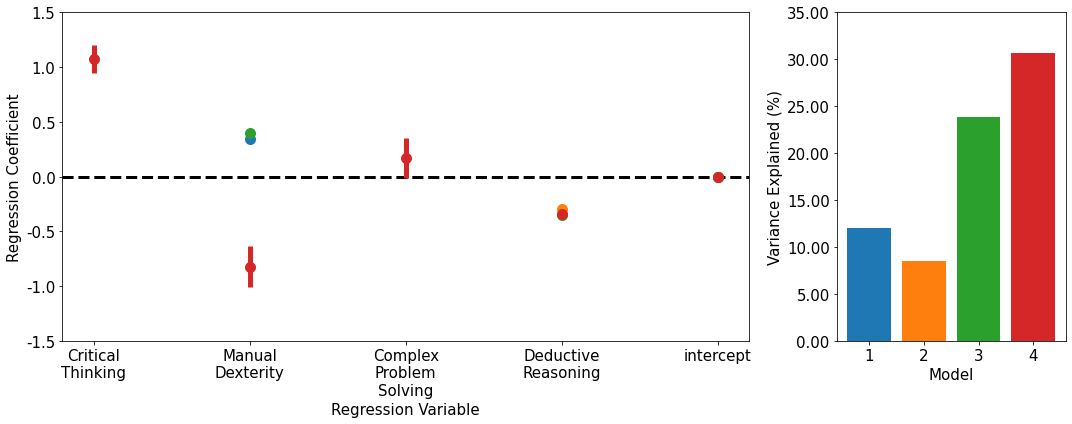

In [38]:
models = [
        ["Critical Thinking",],
        ["Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity",],
        ["Critical Thinking","Manual Dexterity","Complex Problem Solving","Deductive Reasoning",],
]
visualizeMultiOLS(data,"Annual Wage",models,addIntercept=True,standardize=True)

Adding an additional variable to an OLS regression model will always increase or, at worst, not change the model's $R^2$.

$$
R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}}
$$

If the new variable does contribute some new information, it will help increase the Explained Variance since the model can fit the data better.

If the new variable doesn't contribute new information, it might not increase the Explained Variance  but it won't increase it either.

In [143]:
# from before. Start with all variables and experiment with removing them
temp = data[[
    "Critical Thinking",
    "Deductive Reasoning",
    "Complex Problem Solving",
    "Manual Dexterity"
]].copy()
for f in temp.columns:
    print("VIF(%s) = %0.3f" % (f,VIF(temp[f],temp.drop(columns=f))))

VIF(Complex Problem Solving) = 1.016
VIF(Manual Dexterity) = 1.016


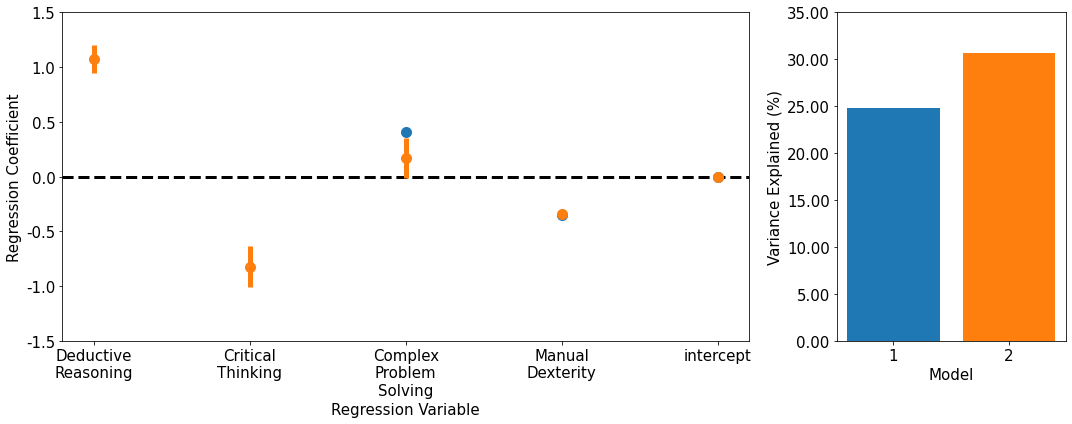

In [40]:
models = [
    ["Deductive Reasoning","Manual Dexterity",],
    ["Deductive Reasoning","Critical Thinking","Complex Problem Solving","Manual Dexterity",],
]
visualizeMultiOLS(data,"Annual Wage",models,addIntercept=True,standardize=True)

If the new variable is collinear with existing variables, then it is not actually increasing the information available to the model, but it will still increase $R^2$

This motivates **Adjusted $R^2$** that penalizes models with extra variables. `

There are multiple ways to penalize large models. But the most common is 
$$
\text{adj }R^2 = 1-\left(1-R^2\right)\frac{n-1}{n-p-1}
$$
where $n$ is the number of rows of data and $p$ is the number of variables in the model.

Note that adj $R^2$ can actually be negative if $n< p+1$

In [146]:
# Generate synthetic data with increasing number of variables
np.random.seed(42)
n = 200  # number of samples
k_list = np.arange(1, 50, 5)  # different numbers of predictors
r2_data = np.zeros((len(k_list),2))

for i in range(len(k_list)):
    k = k_list[i]
    X = np.random.randn(n, k)
    # True relationship only depends on first variable
    y = X[:, 0] + np.random.randn(n) * 0.5
    
    # Fit model
    model = LinearRegression().fit(X, y)
    
    # Calculate R2 and adjusted R2
    r2 = model.score(X, y)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    r2_data[i,:] = [r2,adj_r2]

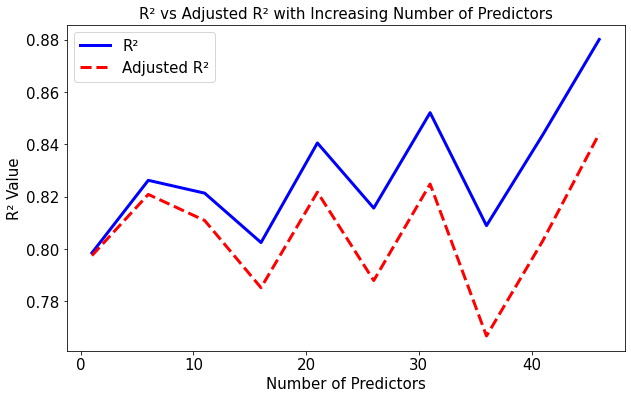

In [147]:
# hide
plt.figure(figsize=(10, 6))
plt.plot(k_list, r2_data[:,0], 'b-', label='R²',lw=3)
plt.plot(k_list, r2_data[:,1], 'r--', label='Adjusted R²',lw=3)
plt.xlabel('Number of Predictors',fontsize=15)
plt.ylabel('R² Value',fontsize=15)
plt.title('R² vs Adjusted R² with Increasing Number of Predictors',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15);

In [148]:
# What about our skills/wage data?
models = [
    ["Deductive Reasoning",],
    ["Deductive Reasoning","Manual Dexterity",],
    ["Deductive Reasoning","Manual Dexterity","Critical Thinking",],
    ["Deductive Reasoning","Manual Dexterity","Critical Thinking","Complex Problem Solving",],
    list(data.drop(columns="Annual Wage").columns),
]
y = data["Annual Wage"]
z = np.zeros((len(models),4))
for i in range(len(models)):
    model = models[i]
    n,p = len(data),len(model)+1
    yhat = LinearRegression(fit_intercept=True).fit(data[model],y).predict(data[model])
    R2 = scipy.stats.pearsonr(yhat,y)[0]**2
    adjR2 = 1-(1-R2)*(n-1)/(n-p-1)
    z[i,:] = i+1,R2,adjR2,p
pd.DataFrame(data=z,columns=["Model","R2","adj R2",'variable count']).set_index('Model').map(regRelabel).T

Model,1.0,2.0,3.0,4.0,5.0
R2,0.126,0.248,0.250,0.306,0.727
adj R2,0.125,0.247,0.248,0.305,0.697
variable count,2.000,3.000,4.000,5.000,233.000


Many skills contribute to the model's annual wage prediction, but some skills are redundant. And other factors not captured by skills may explain the remaining variance in annual wages that is not explained by skills alone.

# LASSO Regression

Another option for handling models with many variables is to consider alternatives to OLS regression.

**LASSO regression** adds a penalty equal to the absolute value of the magnitude of the coefficients to the model's predictive performance, thus promoting sparsity in the coefficients.

As with OLS, LASSO regression solves the problem 
$
\gmath
M\vec{x}=\vec{y}
\gap
$
by calculating
$
\gmath
\hat{\beta}=(M^TM)^{-1}M^T\vec{y}
\gap
$
so that $M\hat{\beta}=\hat{y}\approx\vec{y}$

But, instead of minimizing residuals squared, LASSO additionally penalizes for the magnitude of the estimated coefficients:
$$
    \frac{1}{2n} \sum_{i=1}^{n} (\vec{y}_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\hat{\beta}_j|
$$
where $\alpha$ is the tuning parameter that controls the strength of the penalty.

The $\gmath \alpha \sum_{j=1}^{p} |\hat{\beta}_j|$ term is minimized either 
1. by finding smaller coefficients (but coefficients are determined by the data!)
2. or removing variables from the model (i.e., setting coefficients to $\hat{\beta}_j=0$)

As $\alpha$ increases, more coefficients are pushed towards zero, effectively performing variable selection.

Let's again use the skills-wage data to explore this.

In [44]:
from sklearn.linear_model import LinearRegression,Lasso
y = data["Annual Wage"]
x = data.drop(columns="Annual Wage")
ols = LinearRegression(fit_intercept=True).fit(x,y)
yhat_ols = ols.predict(x)
lasso = Lasso(
    alpha=1,
    fit_intercept=True,
    max_iter=100_000, # the calculation needs to run extra iterations for our data
).fit(x,y)
yhat_lasso = lasso.predict(x) 

In [45]:
r2_ols = scipy.stats.pearsonr(y,yhat_ols)[0]**2
r2_lasso = scipy.stats.pearsonr(y,yhat_lasso)[0]**2
r2_ols,r2_lasso

(0.7267812167540603, 0.7257723736655329)

In [46]:
#hide 
beta_ols = ols.coef_
beta_lasso = lasso.coef_

def scaledCoefCompare(w=1):
    plt.figure(figsize=(10,4))
    plt.plot(beta_ols,'o',label="OLS")
    plt.plot(beta_lasso,'o',label="LASSO")
    yy = plt.ylim()
    plt.ylim(((10**w)*yy[0],(10**w)*yy[1]))
    plt.legend(ncols=2,fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Coefficient Index ($j$)",fontsize=15)
    plt.ylabel("Regression Coefficient ($\\hat{\\beta}_j$)",fontsize=15)
    plt.tight_layout()

    
# W = np.hstack((np.linspace(.0001,.02,10),np.arange(.02,1,.01)))
# W = [,.02,.03,1]
widgets.interact(scaledCoefCompare,
#                  w=(0,1,.01),
#                  w=W,
                 w = (-4,0,.01)
                );

interactive(children=(FloatSlider(value=0.0, description='w', max=0.0, min=-4.0, step=0.01), Output()), _dom_c…

In [47]:
n = 100
np.random.seed(123)

true_beta = np.array([1, 0.5, 0.1, 0])  # True coefficients with one being exactly 0
X = np.random.random((n,4))
X[:,1] = .1*X[:,0] # create correlated data

epsilon = np.random.normal(0, 0.5, n)  # Generate noise
y = X @ true_beta + epsilon  # Generate response variable

# Standardize X 
X = (X - X.mean(0)) / X.std(0)
y = (y - y.mean()) / y.std()

# Fit OLS
ols = LinearRegression()
ols.fit(X, y)

# Fit LASSO with different alphas
alphas = [0.01, 0.1, 1.0]
lasso_models = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha,fit_intercept=False)
    lasso.fit(X, y)
    lasso_models.append(lasso)

Text(0, 0.5, 'Value')

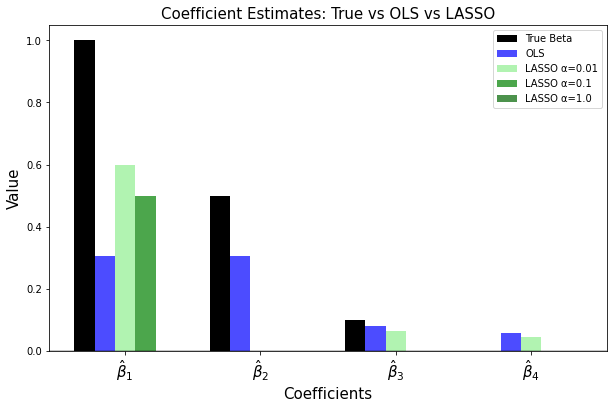

In [48]:
#hide
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(4)
width = 0.15

ax.bar(x - 2*width, true_beta, width, label='True Beta', color='black')
ax.bar(x - width, ols.coef_, width, label='OLS', color='blue', alpha=0.7)

colors = ['lightgreen', 'green', 'darkgreen']
for i, (alpha, lasso) in enumerate(zip(alphas, lasso_models)):
    ax.bar(x + i*width, lasso.coef_, width, 
           label=f'LASSO α={alpha}', color=colors[i], alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(
    ['$\\hat{\\beta}_1$', '$\\hat{\\beta}_2$', '$\\hat{\\beta}_3$', '$\\hat{\\beta}_4$'],
    fontsize=15
)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.legend()
plt.title('Coefficient Estimates: True vs OLS vs LASSO',fontsize=15)
plt.xlabel('Coefficients',fontsize=15)
plt.ylabel('Value',fontsize=15)

Which approach is most predictive?

In [49]:
import warnings
r2 = [ols.score(X,y),]+[lasso.score(X,y) for lasso in lasso_models]

def getR2(model):
    warnings.simplefilter("ignore")
    yhat = model.predict(X)
    r2 = scipy.stats.pearsonr(y,yhat)[0]**2
    p = np.sum(model.coef_ != 0)
    adjR2 = 1-(1-r2)*(n-1)/(n-p-1)
    return r2,adjR2

r = []
for model in [ols,]+lasso_models:
    r2,adjR2 = getR2(model)
    r.append([r2,adjR2])
pd.DataFrame(
    data = r,
    columns = ["R2","adj R2"],
    index = ["OLS","LASSO a=.01","LASSO a=.1","LASSO a=1"],
)

,R2,adj R2
OLS,0.366560,0.339889
LASSO a=.01,0.366314,0.346511
LASSO a=.1,0.358977,0.352436
LASSO a=1,NaN,NaN


# Logistic Regression

OLS and LASSO regression assume a model with the same functional form:
$$
    y\sim \beta_0+\sum_{i=1}^n \beta_i\cdot x_i
$$

But the method for estimating the coefficients $\hat{\beta}_i$ is applicable in many other problems. 

For example, we can use a similar methodological approach to model a binary variable. 

To demonstrate this, we will use a publicly-available data set from <a href="https://www.kaggle.com/competitions/titanic">Kaggle</a> describing the demographics of Titanic passengers and a binary variable indicating if the person passed away (i.e., $\vec{y}_i=0$) or survived (i.e., $\vec{y}_i=1$).

Additional variables include the passengers' age, gender, ticket number, ticket class (e.g., first class ticket holders), number of family onboard, the amount paid for the ticket, cabin number, and their port of embarkment.



In [153]:
data = pd.read_csv("./titanic/train.csv")
data["Sex"] = data["Sex"].apply(lambda s: s == "male")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,NaN,S


The approach is to fit a logistic curve 
$
\gmath
y \sim  \frac{1}{1 + e^{-x}}
\gap
$
to the data.

After fitting the logistic curve to the binary variable, we can apply the model to other data where the outcome is unknown. In this case, the model gives us a probability that the outcome is 1.

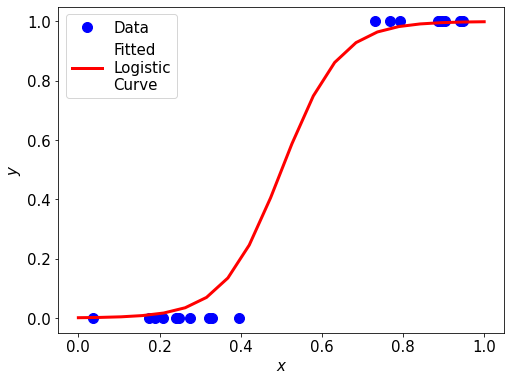

In [154]:
# hide
from sklearn.linear_model import LogisticRegression
n = 1000
x = np.hstack((.4*np.random.rand(n),.4*np.random.rand(n)+.6))
y = np.hstack((np.zeros(n),np.ones(n)))


L = LogisticRegression(fit_intercept=True).fit(x[:,np.newaxis],y)
xx = np.linspace(0,1,20)
yy = L.predict_proba(xx[:,np.newaxis])[:,1]
plt.figure(figsize=(8,6))
plt.plot(x[:10],y[:10],'o',color='b',markersize=10,alpha=1,label="Data")
plt.plot(x[-10:],y[-10:],'o',color='b',markersize=10,alpha=1,label="_Data")
plt.plot(xx,yy,lw=3,color='r',label="Fitted\nLogistic\nCurve")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.legend(fontsize=15);

The visualization demonstrates the approach for a model containing a single variable, but we need to expand it to be able to include multiple independent variables.

This approach is called **Logistic Regression** and it requires a small transformation of the logistic curve to turn it into a regression model.

For simplicity, let's represent a linear model containing multiple variables using 
$$
M = \beta_0+\sum_{i=1}^n \beta_i\cdot x_i
$$

Then we want to fit the logistic curve:
$
\gmath
y\sim \frac{1}{1+e^{-M}}
$

Let's see this for a simple model $\gmath M=\beta_0 + \beta_1\cdot x_1$

In [162]:
# hide
np.random.seed(534)
n = 1000
x = np.hstack((.4*np.random.rand(n),.4*np.random.rand(n)+.6))
y = np.hstack((np.zeros(n),np.ones(n)))


def logisticFitDemo(b,m):
    L = lambda x: 1/(1+np.exp(-(b+m*x)))
    xx = np.linspace(0,1,20)
    yy = L(xx)
    plt.figure(figsize=(8,6))
    plt.plot(x[:10],y[:10],'o',color='b',markersize=10,alpha=1,label="Data")
    plt.plot(x[-10:],y[-10:],'o',color='b',markersize=10,alpha=1,label="_Data")
    plt.plot(xx,yy,lw=3,color='r',label="Fitted\nLogistic\nCurve")
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$y$",fontsize=15)
#     plt.legend(fontsize=15);
    plt.title("$y\\sim 1/(1+e^{%0.2f+%.2f\\cdot x})$" % (b,m),fontsize=15)
    plt.tight_layout()
    
# logisticFitDemo(0,3)
widgets.interact(logisticFitDemo,b=(-10,10,.05),m=(0,10,.05));

interactive(children=(FloatSlider(value=0.0, description='b', max=10.0, min=-10.0, step=0.05), FloatSlider(val…

Here is how it works. First, remember that the dependent variable $y$ is a binary variable in the data, but predictions $\hat{y}$ are the probabilities of an outcome of 1.

$$
\color{orange}{y} 
\approx \color{orange}{p(\text{outcome})}=\frac{1}{1+e^{-M}}
\gap\Rightarrow\gap
1+e^{-M} = \frac{1}{p(\text{outcome})}
\gap\Rightarrow\gap
M = -\ln\left(\frac{1}{p(\text{outcome})}-1\right)
$$

$$
\Rightarrow\gap
M = -\ln\left(\frac{1}{p(\text{outcome})}-\frac{p(\text{outcome})}{p(\text{outcome})}\right)
=\color{red}{-}\ln\left(\frac{1-p(\text{outcome})}{p(\text{outcome})}\right)
=\ln\left(\left(\frac{1-p(\text{outcome})}{p(\text{outcome})}\right)^{\color{red}{-1}}\right)
=\ln\left(\frac{p(\text{outcome})}{1-p(\text{outcome})}\right)
$$

In other words, we transform the problem into
$
\gmath
\color{blue}{\ln\left(\frac{p(\text{outcome})}{1-p(\text{outcome})}\right)}\sim M=\beta_0+\sum_{i=1}^n \beta_i\cdot x_i
$

The left-hand side is called the <font color="blue">**log odds**</font> just like when you here odds in a gambling situtation (e.g., betting on the a sports team winning a game).

If winning the game is $y=1$ and losing is $y=0$, then $p(\text{outcome})$ is the probability of winning the game and $1-p(\text{outcome})$ is the probability of losing the game. 

If $p(\text{outcome})=2/3$, then $1-p(\text{outcome})=1/3$ and $p(\text{outcome})/(1-p(\text{outcome})) = 2/1$ so we say you have "2-to-1 odds" of winning the bet.

Let's try logistic regression on our Titanic data

In [156]:
from sklearn.linear_model import LogisticRegression
X = data[["Sex","Age","Fare","SibSp","Parch"]].fillna(0)
y = data["Survived"].fillna(0)
L = LogisticRegression(fit_intercept=True).fit(X,y)
yhat = L.predict_proba(X)[:,1]
outcome = pd.DataFrame(
    data = np.vstack((yhat,y)).T,
    columns=["prediction","Survived"]
)
outcome["predict Survive"] = outcome["prediction"] > .5
outcome.head()

,prediction,Survived,predict Survive
0,0.128649,0.0,False
1,0.820594,1.0,True
2,0.727612,1.0,True
3,0.779151,1.0,True
4,0.167321,0.0,False


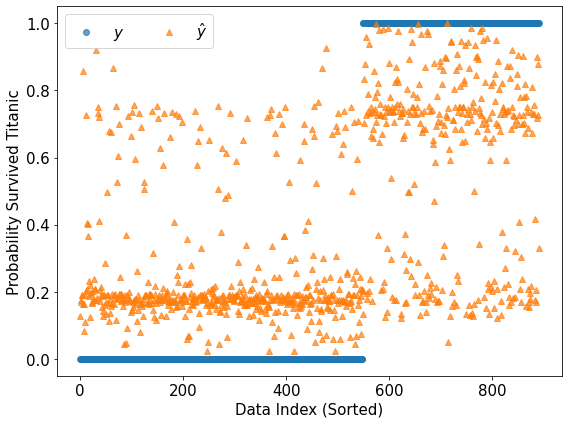

In [157]:
# hide
xx = np.arange(len(y))
I = np.argsort(y)
plt.figure(figsize=(8,6))
plt.plot(xx,y[I],'o',alpha=.7,label="$y$")
plt.plot(xx,yhat[I],'^',alpha=.7,label="$\\hat{y}$")
plt.legend(ncols=2,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Data Index (Sorted)",fontsize=15)
plt.ylabel("Probability Survived Titanic",fontsize=15)
plt.tight_layout()

In [158]:
# Count the data points in each quadrant
temp = outcome.groupby(["predict Survive","Survived"]).count().rename(columns={"prediction":"count"})
temp = temp.join(temp.groupby("predict Survive").sum().rename(columns={"count":"total"}))
temp["rate"] = temp["count"]/temp["total"]
temp.drop(columns={"total"})

count      rate
predict Survive Survived                 
False           0.0         471  0.807890
                1.0         112  0.192110
True            0.0          78  0.253247
                1.0         230  0.746753

What are the regression coefficients $\hat{\beta}_i$?

Note the "Sex" variable is a 1 if male and 0 if female.

In [159]:
pd.Series(data = L.coef_[0], index = X.columns, name="coeff")

Sex     -2.545384
Age     -0.004864
Fare     0.015082
SibSp   -0.359388
Parch   -0.184787
Name: coeff, dtype: float64

$\hat{\beta}_{\text{Sex}}\approx -2.5$ means that the log-odds of survival decreases by 2.5 for males on the Titanic compared to females.

$$
\ln\left(\frac{p(\text{survive}|\text{male})}{1-p(\text{survive}|\text{male})}\right)
- \ln\left(\frac{p(\text{survive}|\text{female})}{1-p(\text{survive}|\text{female})}\right)
\approx-2.5
$$

But log odds is hard to interpret. However, we can equivalently write
$$
\frac{p(\text{survive}|\text{male})}{1-p(\text{survive}|\text{male})}
\Big/
\frac{p(\text{survive}|\text{female})}{1-p(\text{survive}|\text{female})}
\approx e^{-2.5} \approx0.0821
$$

which indicates that the odds of survival for males are approximately 0.082 times the odds of survival for females.

In other words, males have an 91.79% decrease in the odds of survival compared to females, controlling for other variables in the model.

This results make sense when you remember that the Titanic evacuation prioritized women and childrens' access to life boats.

How do we assess the predictive performance of a logistic regression model?

Because the dependent variable $\vec{y}$ is a binary variable, measuring the Pearson correlation or $R^2$ will not work because both of these measures expect that $\vec{y}$ and $\hat{y}$ are distributed according to a t-distribution. 

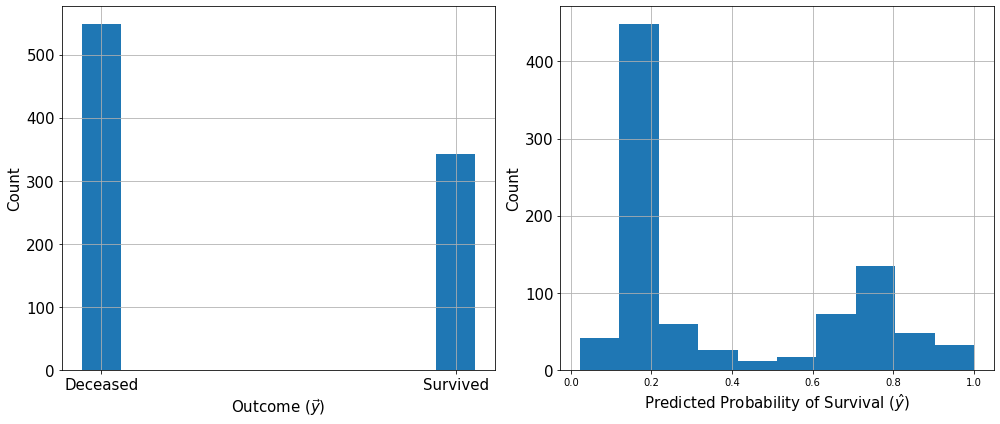

In [160]:
# hide
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
outcome["Survived"].hist()
plt.yticks(fontsize=15)
plt.xticks([.05,.95],["Deceased","Survived"],fontsize=15)
plt.xlabel("Outcome ($\\vec{y}$)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
outcome["prediction"].hist()
plt.yticks(fontsize=15)
# plt.xticks([.05,.95],["Deceased","Survived"],fontsize=15)
plt.xlabel("Predicted Probability of Survival ($\\hat{y}$)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.tight_layout()

Instead, there are a number of **pseduo-$R^2$** methods that can be applied. 

For example, McFadden's $R^2$ compares the model's predictive performance to the performance of a null model using only an intercept term (i.e., the null model always predicts to overall log odds).

Specifically, McFadden's $R^2$ compare the log-likelihood of $\hat{y}$ given $\vec{y}$ when $\hat{y}$ is given by the full model compared to when $\hat{y}_{null}$ is given by the null model.

Likelihood is calculated according to
$$
\mathcal{L}(\hat{y}|\vec{y}) = \prod_{i=1}^{n} P(\hat{y}_i | \vec{y}_i)
= \prod_{i=1}^{n} \color{red}{\hat{y}_i^{\vec{y}_i}}\cdot\color{blue}{(1-\hat{y}_i)^{1-\vec{y}_i}}
$$

Thus the log-likelihood is $\gmath\log(\mathcal{L}(\hat{y}|\vec{y}))=\sum_{i=0}^n \color{red}{\vec{y}_i\cdot\log(\hat{y}_i)}+\color{blue}{(1-\vec{y}_i)\cdot\log(1-\hat{y}_i)}$

Remember that $\vec{y}_i\in\{0,1\}$ while $\hat{y}_i\in[0,1]$, so this equation is summing the log probabilities $\hat{y}_i$ associated with the actual outcome in the data $\vec{y}_i$.

For example, if $\vec{y}_i=1$ then the $i$th term in the sum will be $\color{red}{\log(\hat{y}_i)}$. 
If $\vec{y}_i=0$ then the $i$th term in the sum will be $\color{blue}{\log(1-\hat{y}_i)}$.

McFadden's $R^2$ is given by 
$
\gmath
R^2_{\text{McFadden}} = 1-\frac{\ln(\mathcal{L}(\hat{y}|\vec{y}))}{\ln(\mathcal{L}(\hat{y}_{null}|\vec{y}))}
$

The ratio of the log-likelihood of the fitted model to the log-likelihood of the null model tells us how much the incorporation of predictors improves the fit of the model compared to the simplest model. 

A ratio closer to 1 indicates little improvement, while a lower ratio indicates substantial improvement.

By subtracting this ratio from 1, McFadden's $R^2$ provides a measure where values closer to 1 indicate a better fit of the model with predictors compared to the null model. 

$R^2=0$ implies the model fits no better than the null model, while higher values indicate better performance.

In [161]:
# create the null model prediction
p_survive = outcome["Survived"].mean()
# estimate model intercept term using overall log odds of survival
beta_0 = np.log(p_survive/(1-p_survive))
# plug in the linear model to the logistic function to predict yhat
null_yhat = 1/(1+np.exp(-beta_0))

# define the calculation of log-likelihood
logLikelihood = lambda yhat,y: np.sum( y*np.log(yhat) + (1-y)*np.log(1-yhat) ) 

null_log_likelihood = logLikelihood(null_yhat,outcome["Survived"])
full_log_likelihood = logLikelihood(outcome["prediction"],outcome["Survived"])


mcfadden_rsquare = 1.0 - (full_log_likelihood / null_log_likelihood)
print("McFadden's R^2: %0.3f" % mcfadden_rsquare)

McFadden's R^2: 0.277
